In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.display.float_format = '{:.2f}'.format #Setting changed for better visibility purposes
sns.set()
from scipy.stats import f_oneway
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

### Modeling

This notebook is divided in three parts, testing several models using the following techniques:

1. Addressing class imbalance through built-in model parameters.
2. Addressing class imbalance in the dataset prior to modeling, and training models on balanced data.
3. Hyperparameter tuning of selected models.

Because of the relatively high processing times required when testing models, a first pass is done without hyperparameter tuning to get a sense of time and metrics per model. The last step applies hyperparametric tuning on the best three performing models.

In [2]:
filename = '/Users/agm/Desktop/Capstone2/Data/2018_9_reduced.csv'
df = pd.read_csv(filename)

In [3]:
#Splitting dataset
from sklearn.model_selection import train_test_split

X = df.drop(columns=['action_taken'])
y = df['action_taken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=58)

In [4]:
#Normalizing dataset
from sklearn.preprocessing import MinMaxScaler

#Applying scaler on train set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

#Applying scaler on test set
X_test = scaler.transform(X_test)

## I. Addressing class imbalance through model parameters

### Bagged Decision Trees with Random Undersampling

In [19]:
%%time
# Bagged decision trees with random undersampling for imbalanced classification
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier

# Define model
bbc = BalancedBaggingClassifier(random_state=58)

# Train the model on training data
bbc.fit(X_train, y_train)

# Make predictions
y_pred = bbc.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.59      0.30    178306
           1       0.95      0.78      0.86   1913961

    accuracy                           0.76   2092267
   macro avg       0.58      0.68      0.58   2092267
weighted avg       0.89      0.76      0.81   2092267

CPU times: user 19min 45s, sys: 1min 51s, total: 21min 36s
Wall time: 21min 44s


### Standard Random Forest

In [20]:
%%time
# Standard random forest
from sklearn.ensemble import RandomForestClassifier

# Define model
rfc = RandomForestClassifier(n_estimators=10)

# Train the model on training data
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.27      0.38    178306
           1       0.94      0.99      0.96   1913961

    accuracy                           0.93   2092267
   macro avg       0.80      0.63      0.67   2092267
weighted avg       0.91      0.93      0.91   2092267

CPU times: user 10min 24s, sys: 5.91 s, total: 10min 30s
Wall time: 10min 30s


### Random Forest With Class Weighting

In [27]:
%%time
from sklearn.ensemble import RandomForestClassifier

#Define model
rfc_2 = RandomForestClassifier(n_estimators=10, class_weight='balanced')

# Train the model on training data
rfc_2.fit(X_train, y_train)

# Make predictions
y_pred = rfc_2.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.25      0.37    178306
           1       0.93      0.99      0.96   1913961

    accuracy                           0.93   2092267
   macro avg       0.81      0.62      0.67   2092267
weighted avg       0.91      0.93      0.91   2092267

CPU times: user 9min 29s, sys: 8.39 s, total: 9min 37s
Wall time: 9min 39s


### Random Forest With Bootstrap Class Weighting

In [22]:
%%time
from sklearn.ensemble import RandomForestClassifier

#Define model
rfc_3 = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')

# Train the model on training data
rfc_3.fit(X_train, y_train)

# Make predictions
y_pred = rfc_3.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.25      0.37    178306
           1       0.93      0.99      0.96   1913961

    accuracy                           0.93   2092267
   macro avg       0.81      0.62      0.66   2092267
weighted avg       0.91      0.93      0.91   2092267

CPU times: user 9min 49s, sys: 7.77 s, total: 9min 57s
Wall time: 9min 58s


### Random Forest With Random Undersampling

In [25]:
%%time
from imblearn.ensemble import BalancedRandomForestClassifier

#Define model
brfc = BalancedRandomForestClassifier(n_estimators=10)

# Train the model on training data
brfc.fit(X_train, y_train)

# Make predictions
y_pred = brfc.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.15      0.69      0.25    178306
           1       0.96      0.64      0.77   1913961

    accuracy                           0.65   2092267
   macro avg       0.56      0.67      0.51   2092267
weighted avg       0.89      0.65      0.72   2092267

CPU times: user 2min 10s, sys: 10.4 s, total: 2min 21s
Wall time: 2min 21s


### Easy Ensemble

In [26]:
%%time
from imblearn.ensemble import EasyEnsembleClassifier

#Define model
ee = EasyEnsembleClassifier(n_estimators=10)

# Train the model on training data
ee.fit(X_train, y_train)

# Make predictions
y_pred = ee.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      0.58      0.30    178306
           1       0.95      0.79      0.86   1913961

    accuracy                           0.77   2092267
   macro avg       0.58      0.69      0.58   2092267
weighted avg       0.89      0.77      0.82   2092267

CPU times: user 51min 38s, sys: 5min 56s, total: 57min 34s
Wall time: 57min 46s


### Weighted Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

# Define model
lr = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=1000)

# Train the model on training data
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64    178286
           1       0.64      0.76      0.70    177643

    accuracy                           0.67    355929
   macro avg       0.68      0.67      0.67    355929
weighted avg       0.68      0.67      0.67    355929



### Linear Support Vector Classification

In [23]:
from sklearn.svm import LinearSVC

# define model
lsvc = LinearSVC(random_state=0, tol=1e-5, max_iter=1000)

# Fit the model on training data
lsvc.fit(X_train, y_train)

# Make predictions
y_pred = lsvc.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63    178286
           1       0.64      0.77      0.70    177643

    accuracy                           0.67    355929
   macro avg       0.68      0.67      0.67    355929
weighted avg       0.68      0.67      0.67    355929



### Extreme Grading Boosting

In [8]:
%%time
import xgboost as xgb

# Create XGB Classifier object
xgbc = xgb.XGBClassifier(objective = "binary:hinge")

# Fit the model on training data
xgbc.fit(X_train, y_train)

# Make predictions
y_pred = xgbc.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.23      0.35    178306
           1       0.93      0.99      0.96   1913961

    accuracy                           0.93   2092267
   macro avg       0.85      0.61      0.66   2092267
weighted avg       0.92      0.93      0.91   2092267

CPU times: user 2h 40min 25s, sys: 1min 51s, total: 2h 42min 17s
Wall time: 21min 53s


## II. Addressing class imbalance in the dataset before fitting models

In [9]:
from sklearn.utils import resample

# Because the most valuable data is the one for the minority class (action_taken=0), and since we have millions 
# of observations, downsampling the majority class is the approach selected.

# Separate majority and minority classes
df_majority = df[df.action_taken==1]
df_minority = df[df.action_taken==0]

# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,                  # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=58)

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
print(df_downsampled.action_taken.value_counts())

# Splitting dataset
X = df_downsampled.drop(columns=['action_taken'])
y = df_downsampled['action_taken']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=58)

# Normalizing dataset: applying scaler on train set
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

# Applying scaler on test set
X_test = scaler.transform(X_test)

0    711858
1    711858
Name: action_taken, dtype: int64


### Random Forest

In [15]:
%%time
from sklearn.ensemble import RandomForestClassifier

#Define model
rfc = RandomForestClassifier(n_estimators=10)

# Train the model on training data
rfc.fit(X_train, y_train)

# Make predictions
y_pred = rfc.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68    178286
           1       0.68      0.64      0.66    177643

    accuracy                           0.67    355929
   macro avg       0.67      0.67      0.67    355929
weighted avg       0.67      0.67      0.67    355929

CPU times: user 53.6 s, sys: 1.05 s, total: 54.7 s
Wall time: 55 s


### Logistic Regression

In [21]:
%%time

from sklearn.linear_model import LogisticRegression

# Define model
lr = LogisticRegression(max_iter=1000)

# Train the model on training data
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64    178286
           1       0.64      0.76      0.70    177643

    accuracy                           0.67    355929
   macro avg       0.68      0.67      0.67    355929
weighted avg       0.68      0.67      0.67    355929

CPU times: user 4min 23s, sys: 3.94 s, total: 4min 27s
Wall time: 1min 8s


### Logistic Regression with SGD training

In [17]:
%%time
from sklearn.linear_model import SGDClassifier

# Define model
sgd = SGDClassifier(loss='log', max_iter=100, tol=1e-3)

# Train the model on training data
sgd.fit(X_train, y_train)

# Make predictions
y_pred = sgd.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65    178286
           1       0.65      0.71      0.68    177643

    accuracy                           0.67    355929
   macro avg       0.67      0.67      0.67    355929
weighted avg       0.67      0.67      0.67    355929

CPU times: user 8.09 s, sys: 502 ms, total: 8.59 s
Wall time: 8.03 s


### Gradient Boosting Classifier

In [18]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

# Define model
gbc = GradientBoostingClassifier()

# Train the model on training data
gbc.fit(X_train, y_train)

# Make predictions
y_pred = gbc.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.58      0.65    178286
           1       0.65      0.79      0.71    177643

    accuracy                           0.68    355929
   macro avg       0.69      0.68      0.68    355929
weighted avg       0.69      0.68      0.68    355929

CPU times: user 27.1 s, sys: 621 ms, total: 27.7 s
Wall time: 27.8 s


### Extreme Gradient Boosting

In [10]:
%%time
# Create XGB Classifier object
xgbc = xgb.XGBClassifier(objective = "binary:hinge")

# Fit the model on training data
xgbc.fit(X_train, y_train)

# Make predictions
y_pred = xgbc.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

/Users/agm/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

           0       0.78      0.54      0.64    178286
           1       0.65      0.84      0.73    177643

    accuracy                           0.69    355929
   macro avg       0.71      0.69      0.69    355929
weighted avg       0.71      0.69      0.69    355929

CPU times: user 21min 2s, sys: 4.74 s, total: 21min 7s
Wall time: 2min 47s


### Support Vector Machine

In [20]:
%%time

from sklearn.svm import LinearSVC

# Define model
svm = LinearSVC(random_state=0, tol=1e-5, max_iter=1000)

# Train the model on training data
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.57      0.63    178286
           1       0.64      0.77      0.70    177643

    accuracy                           0.67    355929
   macro avg       0.68      0.67      0.67    355929
weighted avg       0.68      0.67      0.67    355929

CPU times: user 2min 24s, sys: 1.26 s, total: 2min 25s
Wall time: 2min 26s


## III. Hyperparameter tuning on selected models

The most relevant metric is specificity, or recall of the negative class, since what matters most for the purposes at hand is the correct identification of mortgage denials; after all, recall penalizes for false negatives. The examples above suggest that the performance with a downsampled majority class perform as well, if not better, than those models which handle class imbalance parametrically. 

While undersampling means lossing a significant amount of data in the majority class, the purpose of this project is to identify the factors that affect the minority class. Therefore, the decision to downsample is justified.

Scikit-learn offers no scoring optimizer for hyperparameter tuning that is based on specificity alone; in any case, optimizing for specificity alone might yield no predictions for the positive class. The metric most suitable to use in this case which takes specificity into account, to the best of my knowledge, is therefore the Area Under the Receiver Operating Characteristic Curve (ROC AUC).

### Random Forest

In [26]:
%%time
from sklearn.ensemble import RandomForestClassifier

#Define model
rfc = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [10, 50, 100, 300, 500]
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 30]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20, 40]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters using 2-fold cross validation, 
# search across 50 combinations and use all available cores
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 35, cv = 3, 
                                verbose=2, random_state= 58, n_jobs = -1, scoring = 'roc_auc')

# Train model
rfc_random.fit(X_train, y_train)

# Best parameters
print("Tuned Logistic Random Forest Parameters: {}".format(rfc_random.best_params_)) 
print("Best scores are {}".format(rfc_random.best_score_))

Fitting 3 folds for each of 35 candidates, totalling 105 fits


/Users/agm/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [       nan 0.76806139 0.77267813 0.77026458        nan        nan
 0.75914442 0.77742388 0.77612636        nan        nan 0.77876021
        nan 0.77431587        nan        nan 0.7791444  0.7706879
        nan 0.77495085 0.7705368         nan 0.77126571        nan
 0.77100162 0.7711259         nan 0.7705062         nan 0.77936275
 0.77810815 0.77243979 0.77228454        nan        nan]
  category=UserWarning


Tuned Logistic Random Forest Parameters: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Best scores are 0.7793627537619571
CPU times: user 47min 27s, sys: 10.8 s, total: 47min 38s
Wall time: 3h 56min 57s


In [27]:
#Prediction with best tuned model
y_pred = rfc_random.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68    178286
           1       0.68      0.78      0.73    177643

    accuracy                           0.71    355929
   macro avg       0.71      0.71      0.70    355929
weighted avg       0.71      0.71      0.70    355929



### Gradient Boosting Classifier

In [28]:
%%time
from sklearn.ensemble import GradientBoostingClassifier

#Define model
gbc = GradientBoostingClassifier(random_state=58)

# Create the random grid
random_grid = {'learning_rate': [0.1, 0.01, 0.001],
               'n_estimators': [10,25,50,100],
               'min_samples_split': [100,1000,2000,3000],
               'min_samples_leaf': [1,50],
               'max_depth': [2,4,6,8,10],
               'max_features': ['sqrt','log2'],
               'subsample': [0.8,1]}

# Random search of parameters using 2-fold cross validation, 
# search across 50 combinations and use all available cores
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid, n_iter = 35, cv = 3, 
                                verbose=2, random_state= 58, n_jobs = -1, scoring = 'roc_auc')

# Train model
gbc_random.fit(X_train, y_train)

# Best parameters
print("Tuned Gradient Boosting Parameters: {}".format(gbc_random.best_params_)) 
print("Best scores are {}".format(gbc_random.best_score_))

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Tuned Gradient Boosting Parameters: {'subsample': 1, 'n_estimators': 50, 'min_samples_split': 1000, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'learning_rate': 0.1}
Best scores are 0.7703144957440106
CPU times: user 1min 36s, sys: 3.45 s, total: 1min 39s
Wall time: 33min 46s


In [29]:
#Prediction with best tuned model
y_pred = gbc_random.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67    178286
           1       0.67      0.79      0.72    177643

    accuracy                           0.70    355929
   macro avg       0.71      0.70      0.70    355929
weighted avg       0.71      0.70      0.70    355929



### Logistic Regression with SGD training

In [31]:
from sklearn.linear_model import SGDClassifier

#Define model
sgd = SGDClassifier()

loss = ['log'] 
penalty = ['l1', 'l2', 'elasticnet'] 
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000] 
max_iter = [5,10,20,50,100]

# Create the random grid
random_grid = {'loss': loss, 
               'penalty': penalty, 
               'alpha': alpha, 
               'max_iter': max_iter, 
               }

# Random search of parameters using 2-fold cross validation, 
# search across 100 combinations and use all available cores
sgd_random = RandomizedSearchCV(estimator = sgd, param_distributions = random_grid, n_iter = 35, cv = 3, 
                                verbose=2, random_state= 58, n_jobs = -1, scoring = 'roc_auc')

# Train model
sgd_random.fit(X_train, y_train)

# Best parameters
print("Tuned Logistic Regression Parameters: {}".format(sgd_random.best_params_)) 
print("Best scores are {}".format(sgd_random.best_score_))

Fitting 3 folds for each of 35 candidates, totalling 105 fits
Tuned Logistic Regression Parameters: {'penalty': 'l2', 'max_iter': 10, 'loss': 'log', 'alpha': 0.0001}
Best scores are 0.7322892034820647


In [32]:
#Prediction with best tuned model
y_pred = sgd_random.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.58      0.64    178286
           1       0.64      0.76      0.69    177643

    accuracy                           0.67    355929
   macro avg       0.67      0.67      0.67    355929
weighted avg       0.67      0.67      0.66    355929



### Extreme Gradient Boosting

In [36]:
%%time
# Create XGB Classifier object
xgbc = xgb.XGBClassifier(objective = "binary:hinge", use_label_encoder = False)

# Create parameter grid
random_grid = {"learning_rate": [0.1, 0.01, 0.001],
               "gamma" : [0.01, 0.1, 0.3, 0.5, 1, 2],
               "max_depth": [2, 4, 7, 10],
               "colsample_bytree": [0.25, 0.5, 0.75, 1.0],
               "subsample": [0.25, 0.5, 0.75, 1.0],
               "reg_alpha": [0, 0.5, 1],
               "reg_lambda": [1, 2, 3],
               "min_child_weight": [1, 3, 5, 7],
               "n_estimators": [100, 250, 500]}

# Create RandomizedSearchCV Object
xgbc_random = RandomizedSearchCV(estimator = xgbc, param_distributions = random_grid, scoring = "roc_auc",
                                 random_state = 58, n_iter = 35, cv = 3)

# Train model
xgbc_random.fit(X_train, y_train)

# Best parameters
print("Tuned XGBoost Parameters: {}".format(xgbc_random.best_params_)) 
print("Best scores are {}".format(xgbc_random.best_score_))

Tuned XGBoost Parameters: {'subsample': 0.25, 'reg_lambda': 2, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 3, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.5}
Best scores are 0.7053947278972258
CPU times: user 2d 4h 30min 12s, sys: 16min 1s, total: 2d 4h 46min 13s
Wall time: 7h 16min 56s


In [37]:
#Prediction with best tuned model
y_pred = xgbc_random.predict(X_test)

# Print classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.58      0.66    178286
           1       0.66      0.84      0.74    177643

    accuracy                           0.71    355929
   macro avg       0.72      0.71      0.70    355929
weighted avg       0.72      0.71      0.70    355929



### Feature importance

The purpose of this project is not only to be able to predict the outcome of applications; rather, understanding the importance of parameters is important in understanding the extent to which subjective characteristics of applicants (e.g. gender, race, ethnicity) appear to have an impact in loan application outcomes.

In [38]:
def plot_feature_importance (model, top_number, title):
    feat_imp = pd.DataFrame({'importance':model.best_estimator_.feature_importances_*100})    
    feat_imp['feature'] = X.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_number]
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(figsize=(10,7))
    plt.xlabel('Feature Importance %')
    plt.xticks(range(0,int(feat_imp.importance.max()),5))
    plt.title(f'Feature Importances for {title}')
    plt.show()

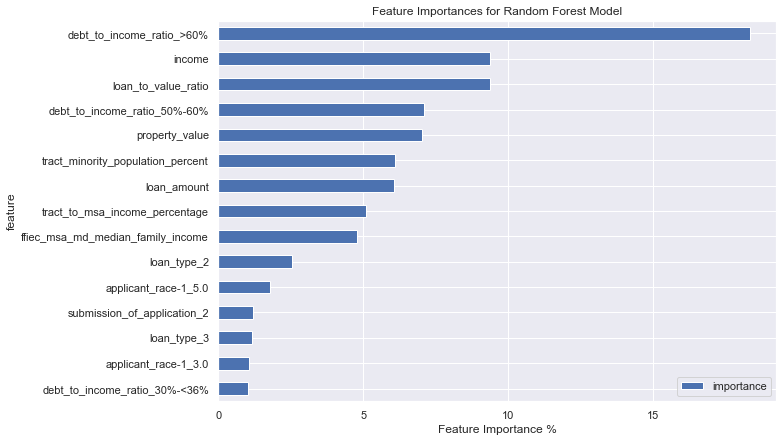

In [39]:
plot_feature_importance(rfc_random, 15, 'Random Forest Model')

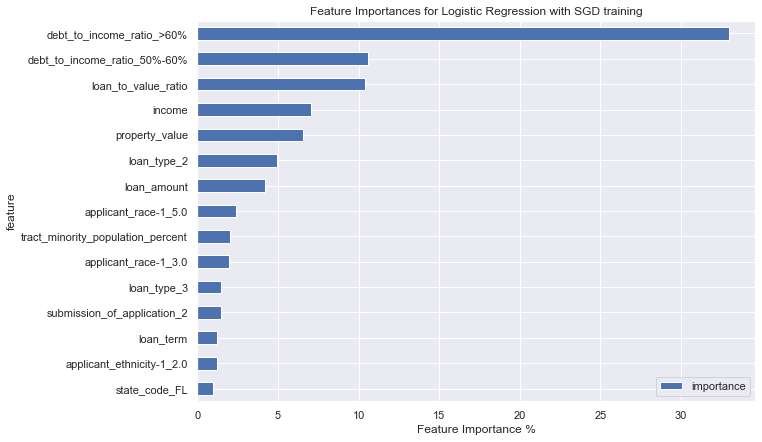

In [40]:
plot_feature_importance(gbc_random, 15, 'Logistic Regression with SGD training')

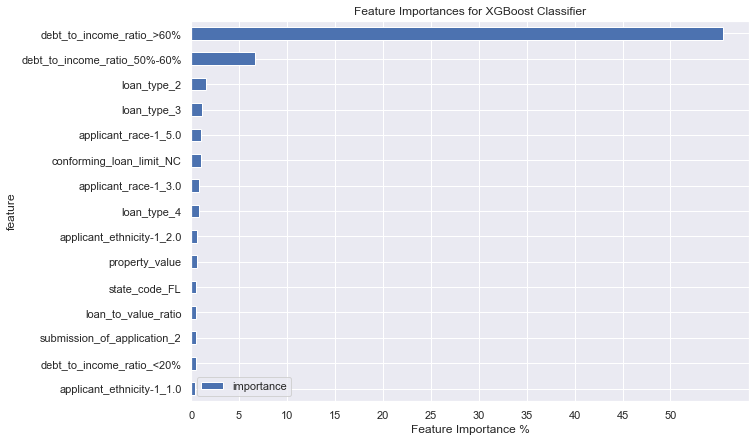

In [41]:
plot_feature_importance(xgbc_random, 15, 'XGBoost Classifier')

### Partial conclusions

The graphs above coincide in that the most important factor to consider is debt to income ratio, particularly if this is greater than 50%, with the most weight given to debt to income ratios above 60%. Also important is data related to income and loan amount. In the three top models selected, race and ethnicity are within the top 15 important features, although their overall importance is less than 5%. While this data is not strong enough to suggest there is racial or ethnic bias, it is nonetheless present in the trends explored in EDA and confirmed by these machine learning models.

### Future work

Further work concerning the influence of subjective factors in the mortgage loan application could examine trends along different granularities: by state, by metropolitan area, by tract. More models can be trained accordingly, with the ability to dedicate more resources to hyperparameter tuning as the sample sizes grow smaller with increased geographical specificity.